<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [5]:
df['Industry'].unique()

array([nan, 'Healthcare', 'Software Development',
       'Banking/Financial Services', 'Other:',
       'Media & Advertising Services', 'Insurance',
       'Internet, Telecomm or Information Services', 'Higher Education',
       'Energy', 'Fintech', 'Retail and Consumer Services',
       'Manufacturing', 'Government',
       'Computer Systems Design and Services',
       'Transportation, or Supply Chain'], dtype=object)

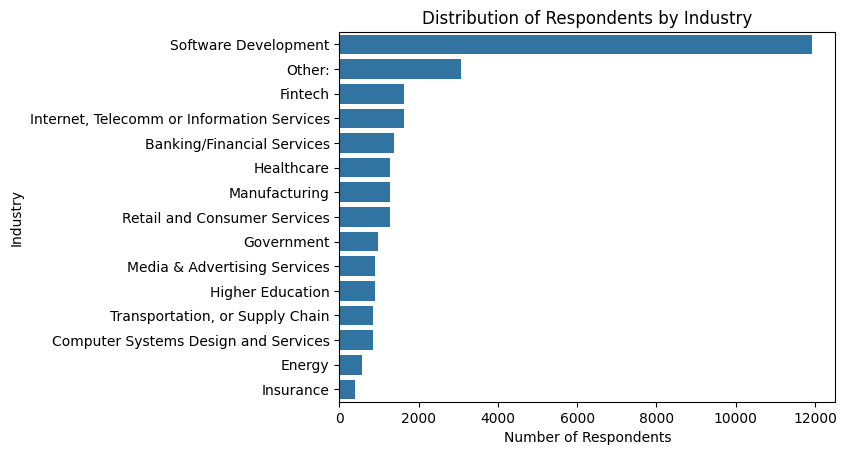

In [15]:
# Value counts
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

# Plot bar chart
sns.barplot(y=industry_counts.index, x=industry_counts.values)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [17]:
df['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ...,  15637.,   9711., 116844.])

In [21]:
# Basic statistics
mean_val = df['ConvertedCompYearly'].mean()
median_val = df['ConvertedCompYearly'].median()
std_val = df['ConvertedCompYearly'].std()

print(f"Mean: {mean_val:,.2f}")
print(f"Median: {median_val:,.2f}")
print(f"Standard Deviation: {std_val:,.2f}")

Mean: 86,155.29
Median: 65,000.00
Standard Deviation: 186,756.97


In [23]:
# Define threshold for outlier detection (e.g., 3 SD above mean)
threshold = mean_val + 3 * std_val
print(f"Threshold (3 SD above mean): {threshold:,.2f}")

# Identify high outliers
outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"\nNumber of outliers above threshold: {len(outliers)}")
print(outliers[['ConvertedCompYearly']].head())

Threshold (3 SD above mean): 646,426.21

Number of outliers above threshold: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32,712.00
Q3: 107,971.50
IQR: 75,259.50
Lower Bound: -80,177.25
Upper Bound: 220,860.75

Number of outliers: 978


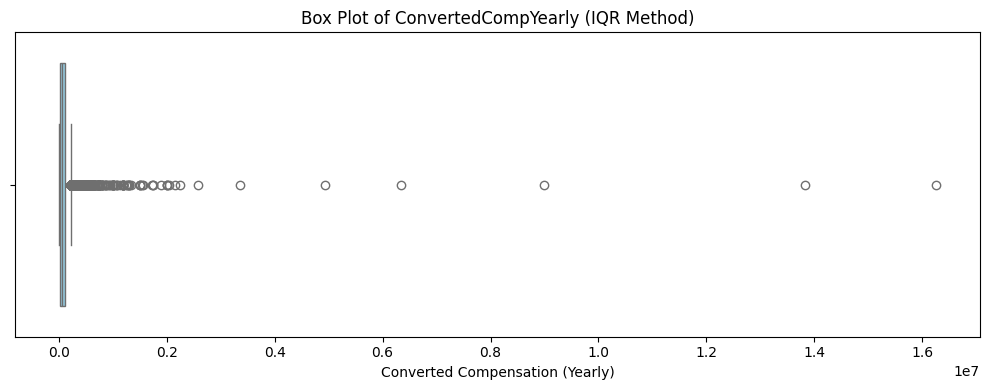

In [27]:
# Calculate IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:,.2f}")
print(f"Q3: {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"\nNumber of outliers: {len(outliers)}")

# Visualize with Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title('Box Plot of ConvertedCompYearly (IQR Method)')
plt.xlabel('Converted Compensation (Yearly)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [29]:
# Create new DataFrame excluding outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate size
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Rows removed as outliers: {df.shape[0] - df_cleaned.shape[0]}")

Original dataset size: 65437 rows
Cleaned dataset size: 22457 rows
Rows removed as outliers: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [31]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [35]:
# Mapping dictionary: Age category → Approximate numeric midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map to new numeric column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# View result
df['AgeNumeric'].unique()

array([16. , 39.5, 49.5, 21. , 29.5, 59.5,  nan, 70. ])

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
